<a href="https://colab.research.google.com/github/karandeep1729/XGBoost/blob/main/XGBOOST05_08_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#. XGBoost (Extreme Gradient Boosting)

**What is XGBoost?**

XGBoost is an advanced version of Gradient Boosting.

It is optimized for speed and performance, making it one of the most popular algorithms in machine learning competitions (e.g., Kaggle).

**How It Works:**

Similar to Gradient Boosting, but includes advanced techniques like:

Regularization: Reduces overfitting by penalizing complex models.

Parallel Processing: Trains models faster.

Tree Pruning: Avoids overgrown trees for better generalization.

**Advantages:**

Very fast and efficient, even with large datasets.

Handles missing data automatically.

Offers high accuracy in most scenarios.

**When to Use:**

For large datasets with many features.

When speed and performance are critical.

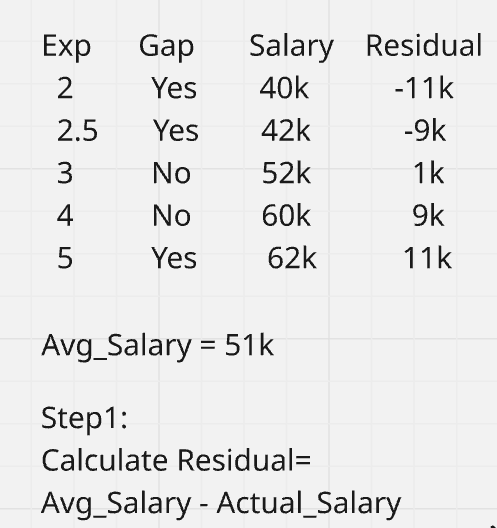

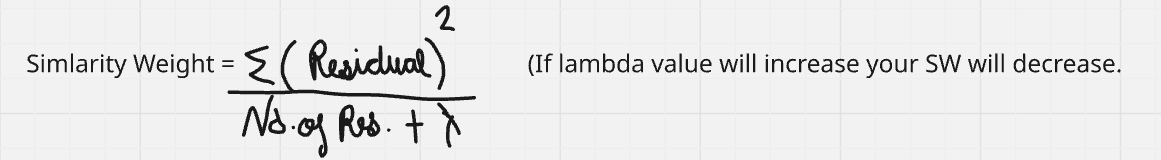

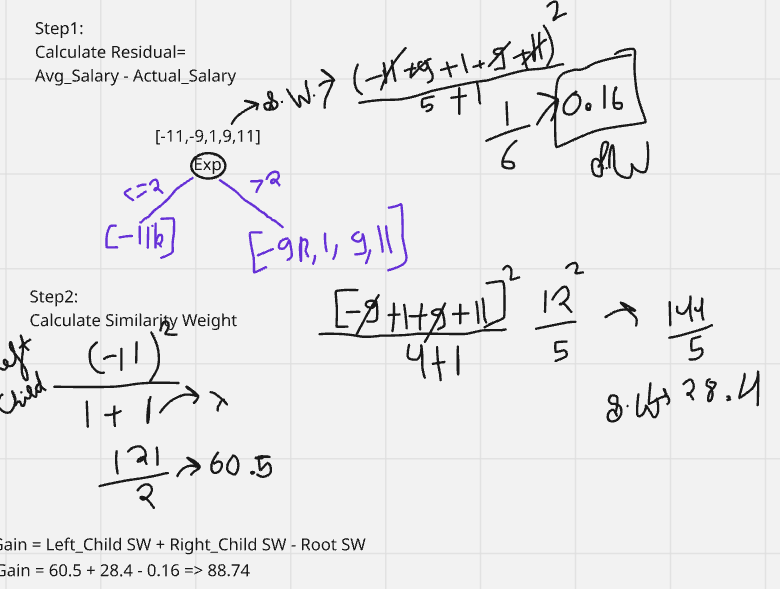

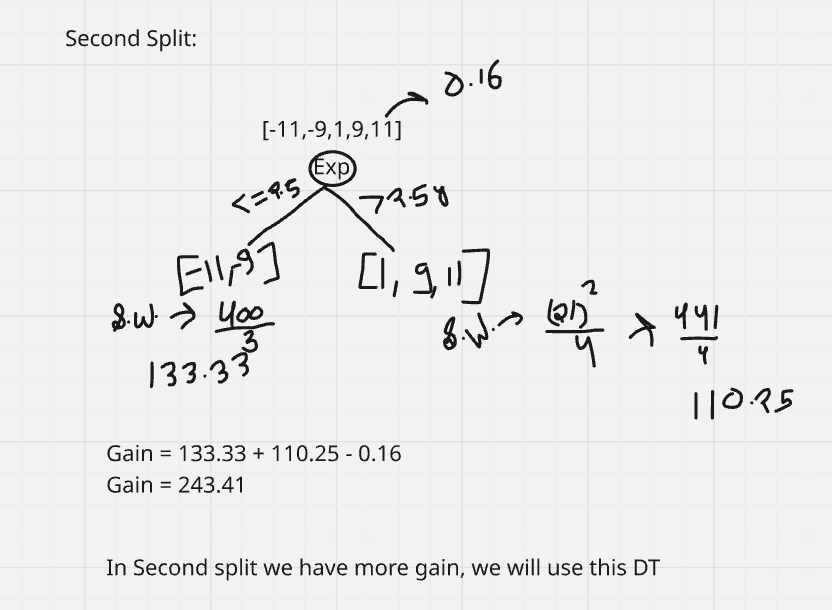

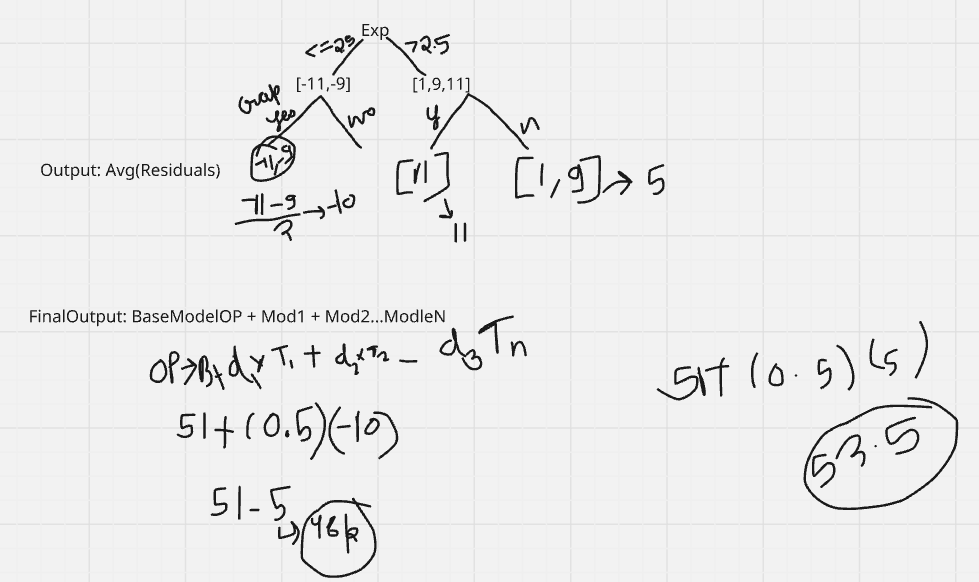

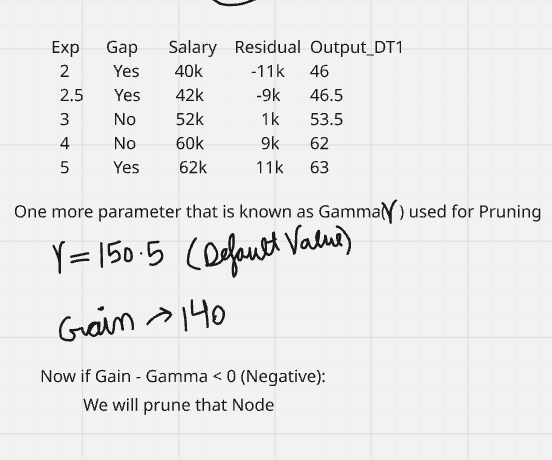

**Dataset URL:** https://drive.google.com/file/d/1JGMe5x05njj9aP4lZPnWoI1kdD3JUgyH/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Mobile-Price-Prediction-cleaned_data.csv')
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [ ]:
# 8:45 AM. Perform EDA and build a regressioin model and check for r2_score.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [ ]:
df.duplicated().sum()

np.int64(264)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
X = df.iloc[:,:-1]
y = df['Price']

In [ ]:
X

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,4.3,4.0,128.0,6.00,48,13.0,4000
1,3.4,6.0,64.0,4.50,48,12.0,4000
2,4.3,4.0,4.0,4.50,64,16.0,4000
3,4.4,6.0,64.0,6.40,48,15.0,3800
4,4.5,6.0,128.0,6.18,35,15.0,3800
...,...,...,...,...,...,...,...
781,4.1,8.0,64.0,4.54,64,8.0,2500
795,3.8,4.0,64.0,4.54,48,15.0,1200
796,4.1,4.0,40.0,4.77,48,15.0,3000
802,3.8,6.0,32.0,4.54,48,12.0,2800


In [ ]:
y

,Price
0,24999
1,15999
2,15000
3,18999
4,18999
...,...
781,1390
795,3580
796,1080
802,1299


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(434, 7)

In [ ]:
y_train.shape

(434,)

In [ ]:
x_test.shape

(109, 7)

In [ ]:
y_test.shape

(109,)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr_model.predict(x_test)

In [ ]:
lr_pred

array([ 2.41242712e+04,  4.38414283e+04,  8.89840738e+03,  9.71250264e+02,
        3.73428420e+03,  2.99556564e+04,  1.11819431e+04,  2.74234464e+04,
        6.76313570e+03,  3.80279278e+04, -1.63172737e+04, -8.21605683e+03,
       -4.35435346e+03,  4.19102454e+03,  8.88725367e+03,  4.85209634e+04,
        2.80312385e+03,  4.18937214e+03,  2.84105045e+03, -1.84451167e+04,
        1.04455804e+03,  1.98253946e+04,  2.97498979e+04,  5.01972320e+04,
        5.06497703e+04,  4.18771974e+03,  3.22674957e+03,  2.73909528e+03,
        1.20221226e+04,  1.29440570e+04, -2.92067046e+01, -8.58533943e+03,
        3.72725221e+03, -3.86249865e+03,  3.31143656e+04,  7.42130195e+03,
        2.76332538e+04,  1.80028024e+04,  2.51960925e+04,  1.48495848e+04,
        9.57037856e+03,  9.36408594e+03,  5.16354672e+03,  2.81935661e+03,
        1.54647144e+04, -1.82495101e+03,  2.43120316e+04,  2.99139550e+04,
       -1.50880724e+03,  3.10446006e+04,  8.50640269e+03, -1.15498258e+03,
        2.19771610e+04,  

In [ ]:
r2_score(y_test,lr_pred)

0.5869834334431239

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xg_pred = xg_model.predict(x_test)

In [ ]:
r2_score(xg_pred,y_test)

0.9136636853218079

In [ ]:
final_model = XGBRegressor(learning_rate=0.03,n_estimators=500,early_stopping_rounds=20,eval_metric='rmse',random_state=42)


# learning rate: 0.03 -> Slows down learning means more stable and better
# n_estimators: Number of models
# early_stopping: It will stop when there's no further improvement by model.


In [ ]:
final_model.fit(x_train, y_train, eval_set=[(x_test,y_test)],verbose=False)

# Train on training data and monitor performance on testing data


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred = final_model.predict(x_test)
r2_score(pred,y_test)

0.8830865025520325